In [1]:


import sys
!{sys.executable} -m pip install opencv-python

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras.utils

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras.datasets

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import cv2
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from keras.datasets import cifar10
from keras import backend as K

from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC


(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_test.shape
Y_test.shape

(10000, 1)

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets


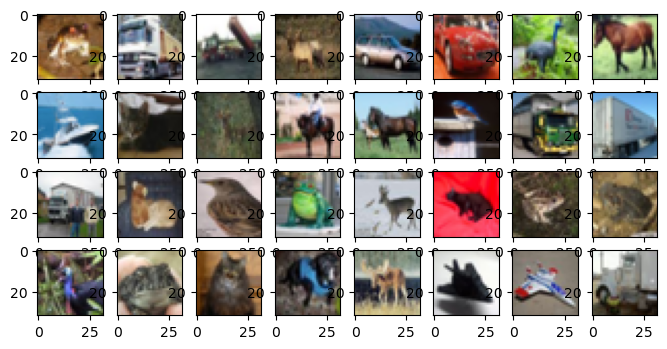

In [12]:
fig=plt.figure(figsize=(8,8))
for i in range(32):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(X_train[i])

In [13]:
X = X_train.reshape(X_train.shape[0], -1)



In [14]:
scaler=preprocessing.StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[-0.97682401, -1.01575822, -0.86457067, ..., -0.05604997,
        -0.54031962, -0.6414024 ],
       [ 0.3172399 ,  0.56158831,  0.67677953, ...,  0.25199477,
         0.11412375,  0.44823767],
       [ 1.69303417,  1.63144074,  1.52203609, ..., -0.71834616,
        -0.63609182, -0.45979572],
       ...,
       [-1.30374542,  0.57530437,  1.27343122, ..., -1.76569828,
        -1.51400366, -0.97434797],
       [ 0.79400029,  1.02793424,  1.33558243, ...,  1.05291109,
         1.02395965,  0.85685269],
       [ 1.33886931,  1.27482326,  1.32315219, ...,  0.56003951,
         0.59298475,  0.70551379]])

In [15]:
pca=PCA()
pca.fit(X)



PCA()

In [16]:
pca.components_.shape

(3072, 3072)

In [17]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.95:
    currentSum+=pca.explained_variance_[k]
    k=k+1
print(k)    


217


In [18]:
pca=PCA(n_components=k)
transformed_data=pca.fit_transform(X)
#trnasformed_test=pca.fit_transform(Y_train)
transformed_data.shape


(50000, 217)

In [22]:
#regressor = ensemble.RandomForestClassifier()
#regressor.fit(X,Y_train)
pca=PCA(n_components=1)
tranasformed_test=pca.fit_transform(Y_train)
tranasformed_test.shape

(50000, 1)


(50000, 1)

In [ ]:
#y_predict=regressor.predict(X)
#print(accuracy_score(Y_train,y_predict))


In [ ]:
#X_test = X_test.reshape(X_test.shape[0], -1)
#scaler.transform(X)
#pca_test=pca
#transformed_data=pca.transform(X_test)
#transformed_data.shape
#y_predict=regressor.predict(X_test)
#print(accuracy_score(Y_test,y_predict))



In [ ]:
#from sklearn import linear_model
#MLR_reg=linear_model.LinearRegression()
#MLR_reg.fit(X,Y_train)

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], -1)
#y_predict=MLR_reg.predict(X_test)
#print(MLR_reg.score(Y_test,y_predict))
#accuracy_score(Y_test, np.argmax(y_predict, axis=1))
#print(y_predict.shape)
#print(Y_test)
#print(np.argmax(y_predict,axis=1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#X_test = X_test.reshape(X_test.shape[0], -1)
#ravel().Y_train = X_test(Y_train, warn=True)

model= make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X,Y_train)

C:\Users\Kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_predict=model.predict(X_test)

In [ ]:
np.savetxt("predictions4.csv",Y_test,delimiter=",",fmt='%f')